<a href="https://colab.research.google.com/github/sudiptiwari/support-vector-machine-from-scratch/blob/main/svg_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load the IRIS Dataset from Google Drive

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI-Project/Dataset/IRIS.csv', encoding='utf-8')

## Let's look into IRIS dataset

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Create a list of Species name 'species'

In [ ]:
# Define a set s
s = set()

# Find the set of 'species'
for val in df['species']:
    s.add(val)

# Convert set 's' to list
s = list(s)

# Since this data consists 3 classes, we want to carry out Binary Classification. So, we remove one types of Iris flowers that is present from 100 to 149
rows_to_drop = list(range(100, 150))

# Check if any of the rows exist in the DataFrame before dropping
if any(idx in df.index for idx in rows_to_drop):
    df = df.drop(df.index[rows_to_drop])
    print("Rows were dropped.")
else:
    print("No rows to drop.")

# Print the list 's'
s

Rows were dropped.


['Iris-versicolor', 'Iris-virginica', 'Iris-setosa']

## Define a function to plot the points and hyperplane

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_svm_data_with_point_and_hyperplane(x1=None, y1=None, w=None, b=None):
    # Convert single values to arrays for consistency
    x = df['sepal_length']
    y = df['petal_length']

    # Separate data for Setosa and Versicolor (0 to 49 is Setosa, 50 to 99 is Versicolor)
    setosa_x = x[:50]
    setosa_y = y[:50]

    versicolor_x = x[50:]
    versicolor_y = y[50:]

    # Plot the data points
    plt.figure(figsize=(8, 6))
    plt.scatter(setosa_x, setosa_y, marker='_', color='green', label='Setosa')
    plt.scatter(versicolor_x, versicolor_y, marker='+', color='red', label='Versicolor')

    # Plot the additional point (x1, y1) if provided
    if x1 is not None and y1 is not None:
        plt.scatter(x1, y1, marker='o', color='blue', label='Additional Point')

    # Plot SVM hyperplane with margins if w and b are provided
    if w is not None and b is not None:
        # Create a range of x values for plotting the hyperplane
        hyperplane_x = np.linspace(min(x), max(x), 100)
        # hyperplane_y = (-w[0] / w[1]) * hyperplane_x - b / w[1]

        # Equation for hyperplane
        hyperplane_y = (-w[0] / w[1]) * hyperplane_x + b / w[1]

        # Plot the hyperplane
        plt.plot(hyperplane_x, hyperplane_y, color='purple', linestyle='-', label='SVM Hyperplane')

        # Equation for hyperplane_margin1_y
        hyperplane_margin1_y = (-w[0] / w[1]) * hyperplane_x + (1 + b) / w[1]

        # Plot the margin1
        plt.plot(hyperplane_x, hyperplane_margin1_y, color='orange', linestyle='--', label='SVM Margin')

        # Equation for hyperplane_margin1_y
        hyperplane_margin2_y = (-w[0] / w[1]) * hyperplane_x + (-1 + b) / w[1]

        # Plot the margin2
        plt.plot(hyperplane_x, hyperplane_margin2_y, color='orange', linestyle='--', label='SVM Margin')

    # Set labels and legend
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Petal Length (cm)')
    plt.title('SVM Data and Hyperplane')

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()

# Example usage:
# plot_svm_data_with_point_and_hyperplane(x1=5.5, y1=4.5, w=[2, -3], b=1)


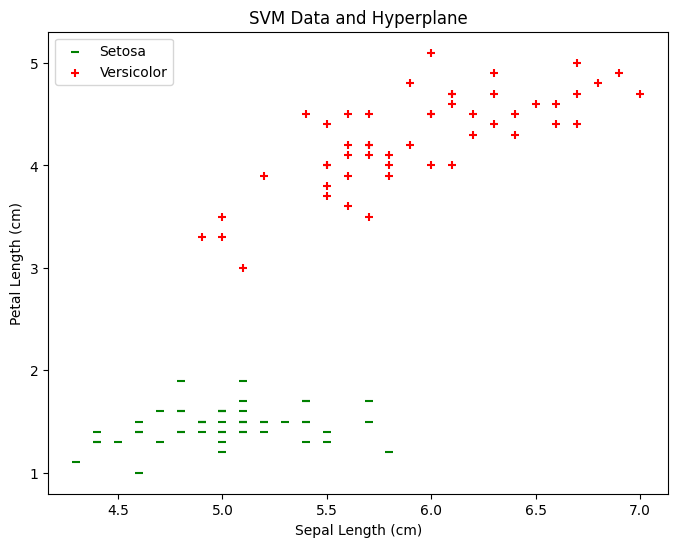

In [ ]:
plot_svm_data_with_point_and_hyperplane()

## Prepare the data for training and validation

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
# Drop the rest of the features and extract Target Values
# Check if 'sepal_width' and 'petal_width' are in the columns of df
if 'sepal_width' in df.columns and 'petal_width' in df.columns:
  df = df.drop(['sepal_width', 'petal_width'], axis = 1)
  print("Removed 'sepal_width' and 'petal_width'.")
else:
  print("DataFrame df does not contain 'sepal_width' and 'petal_width'.")

Removed 'sepal_width' and 'petal_width'.


In [ ]:
# Initialize target to empty vector
Y = []
target = df['species']
# Set target = -1 for Setosa, target = 1 for Versicolor
for value in target:
  if (value == 'Iris-setosa'):
    Y.append(-1)
  else:
    Y.append(1)

# Now we do not need 'species' column in our DataFrame, so we drop it
if 'species' in df.columns:
  df = df.drop(['species'], axis = 1)
  print("Removed 'species' from DataFrame.")

Removed 'species' from DataFrame.


In [ ]:
# Let us look at the DataFrame now
df.head()

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


## Shuffle and split the data into training and test set

In [ ]:
X = df.values.tolist()
""" Above code can be explained as below:
import pandas as pd

# Creating a sample DataFrame
data = {'sepal_length': [5.1, 4.9, 6.7],
        'petal_length': [1.4, 3.0, 5.2]}

df = pd.DataFrame(data)

# Converting DataFrame to a list of lists
X = df.values.tolist()

print(X)
----------------------------------------------
Output:
[[5.1, 1.4], [4.9, 3.0], [6.7, 5.2]]
"""
X, Y = shuffle(X, Y)
""" Assuming X and Y to be list of same length:
X = [1, 2, 3, 4, 5]
Y = ['A', 'B', 'C', 'D', 'E']

X, Y = shuffle(X, Y)
print(X)  # Example output: [3, 5, 1, 4, 2]
print(Y)  # Example output: ['C', 'E', 'A', 'D', 'B']
"""
x_train = []
y_train = []
x_test = []
y_test = []

# Define the train size
train_size = 0.9

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = train_size)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

# Reshape y_train and y_test as vectors - This is optional step but we do it for uniformity.
y_train = y_train.reshape(int(train_size*100),1) # (90,1)
y_test = y_test.reshape(int(100-train_size*100),1) # (10,1)

print(f"The number of train data = {len(x_train)}")
print(f"The number of test data = {len(x_test)}")

The number of train data = 90
The number of test data = 10


## Support Vector Machine

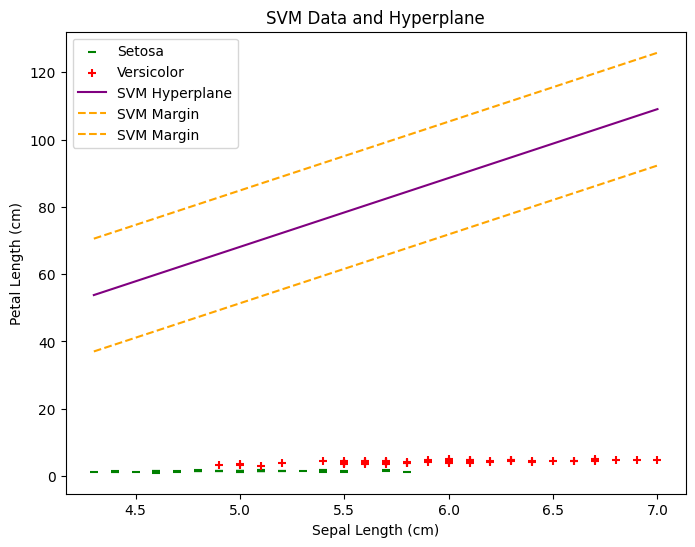

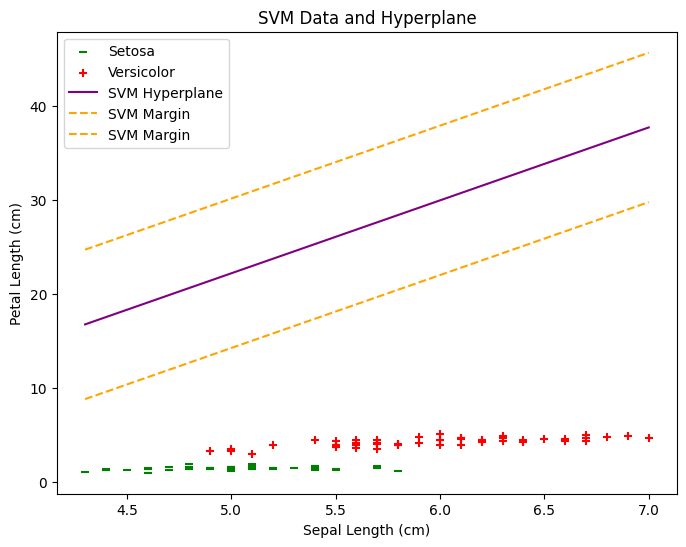

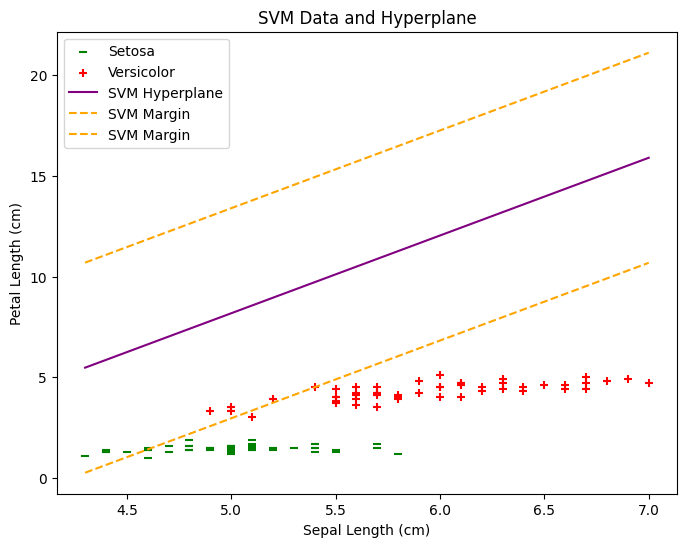

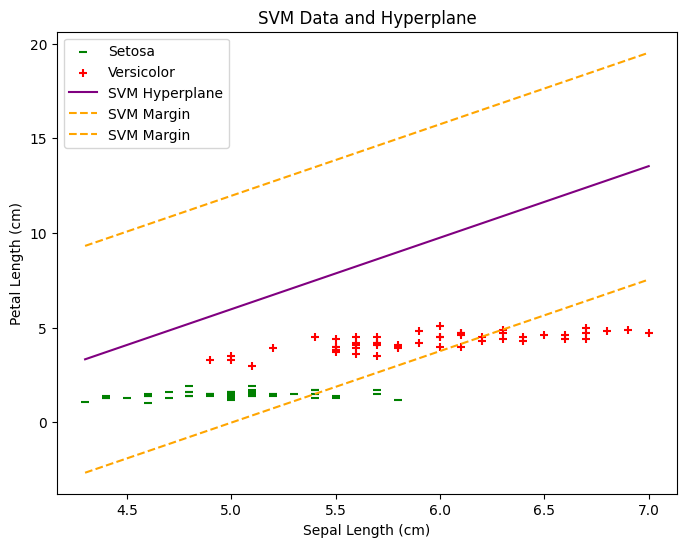

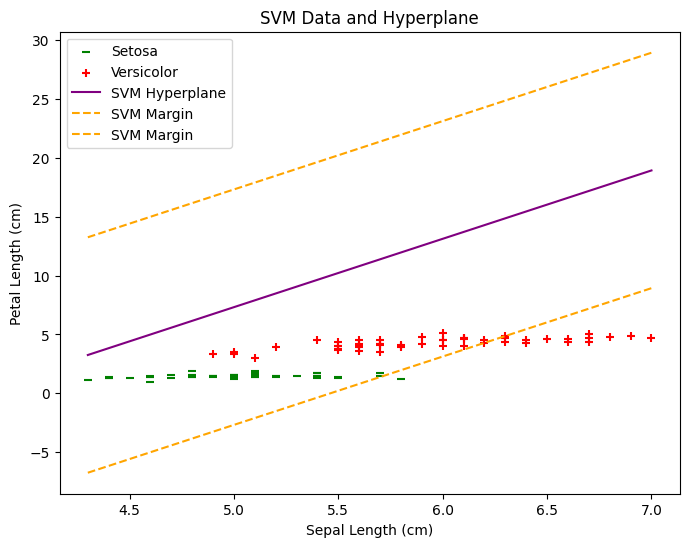

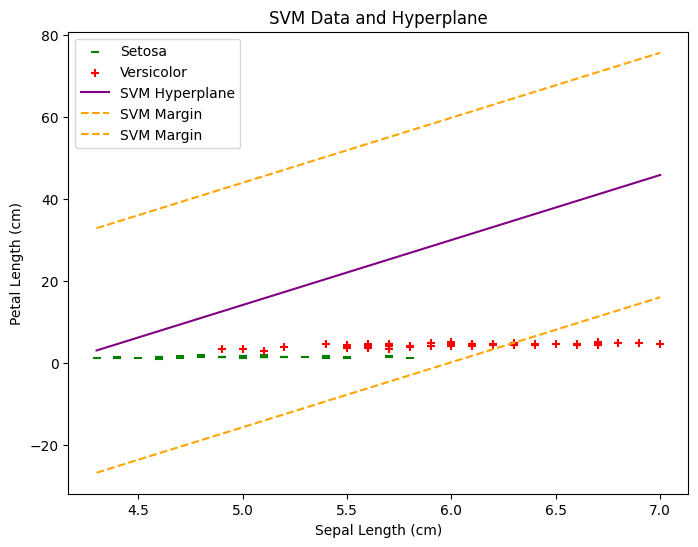

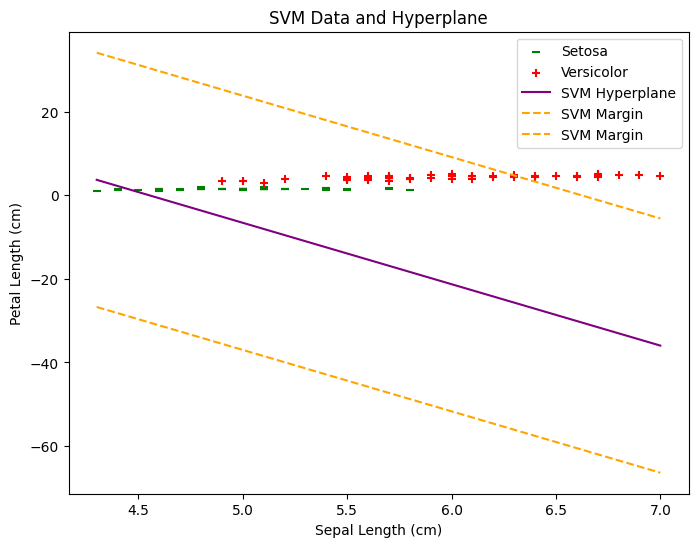

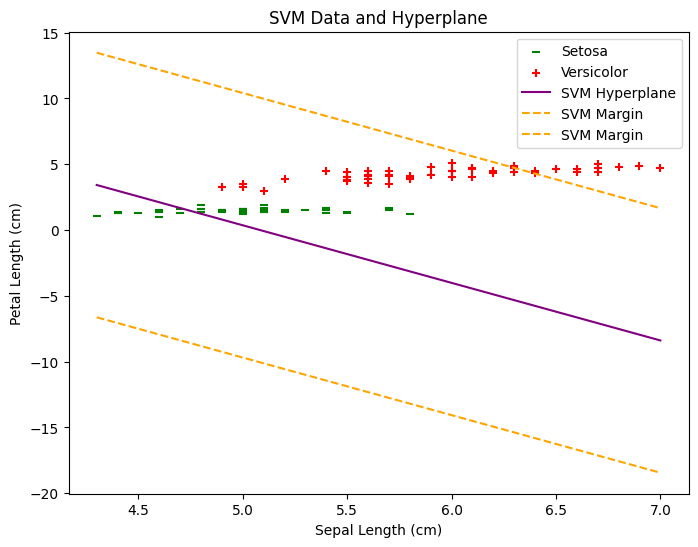

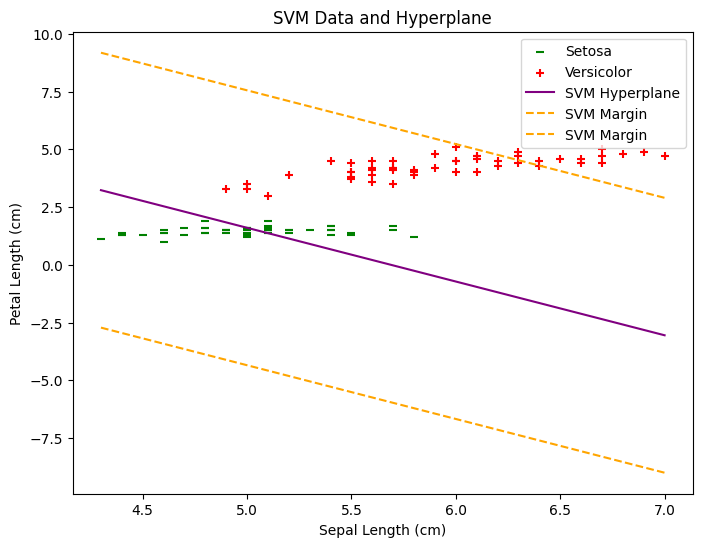

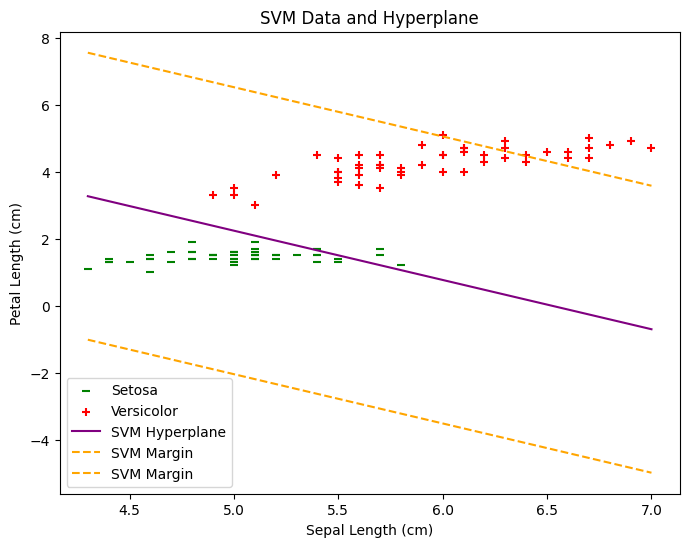

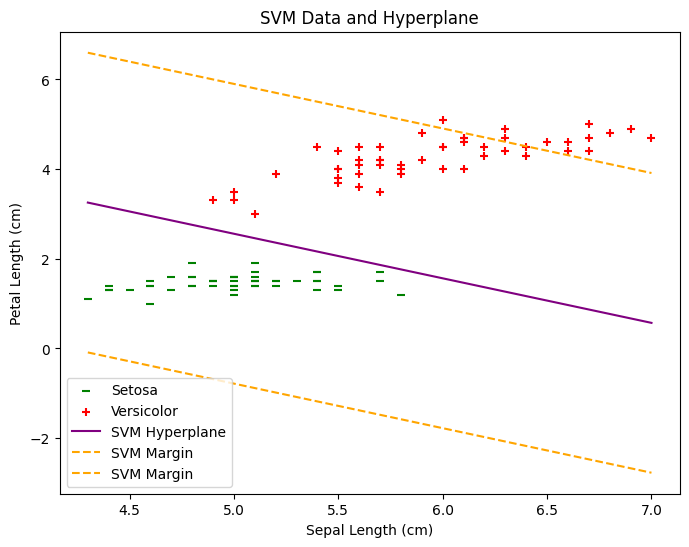

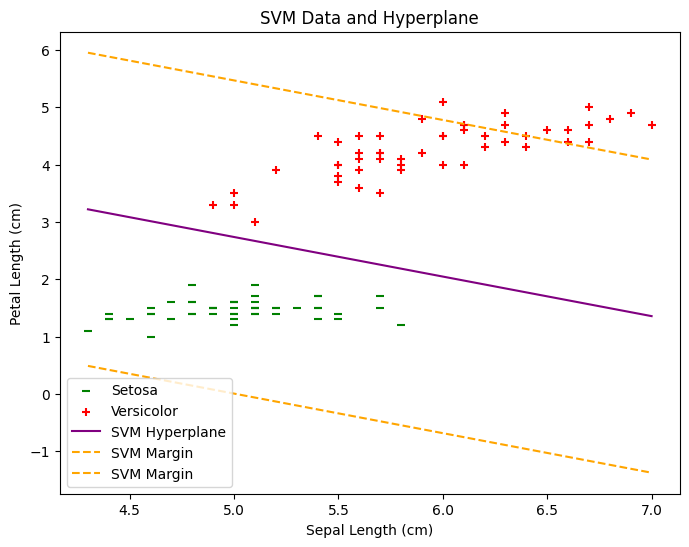

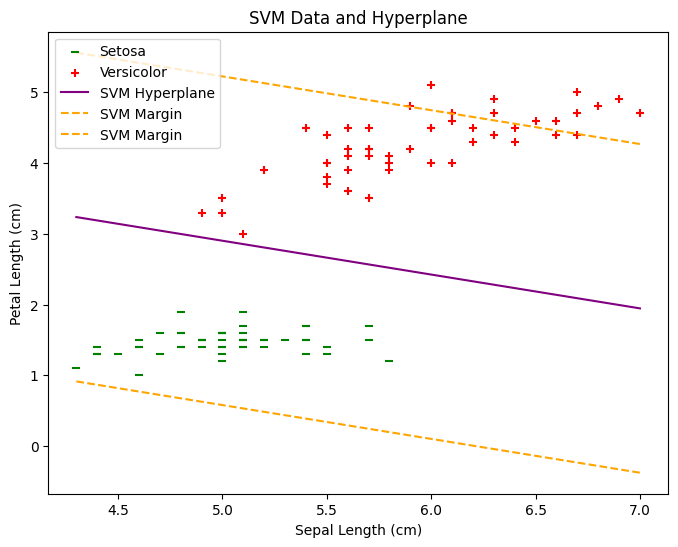

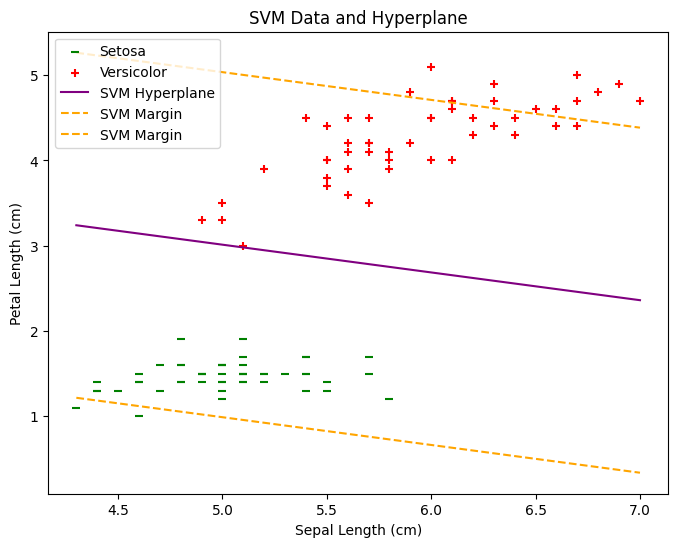

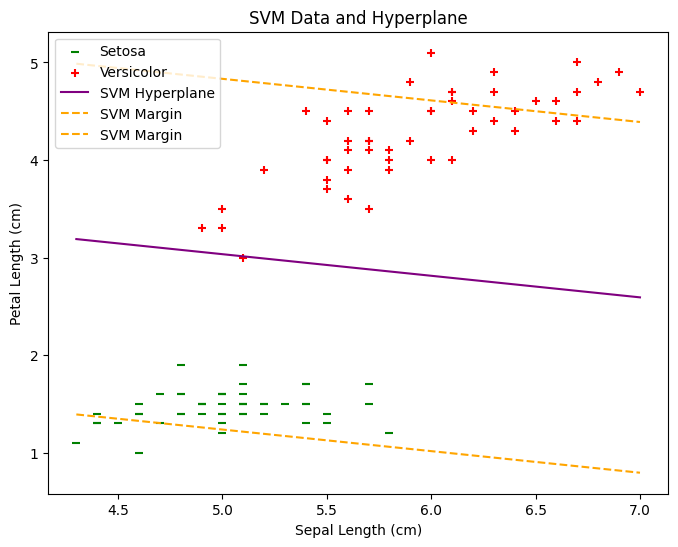

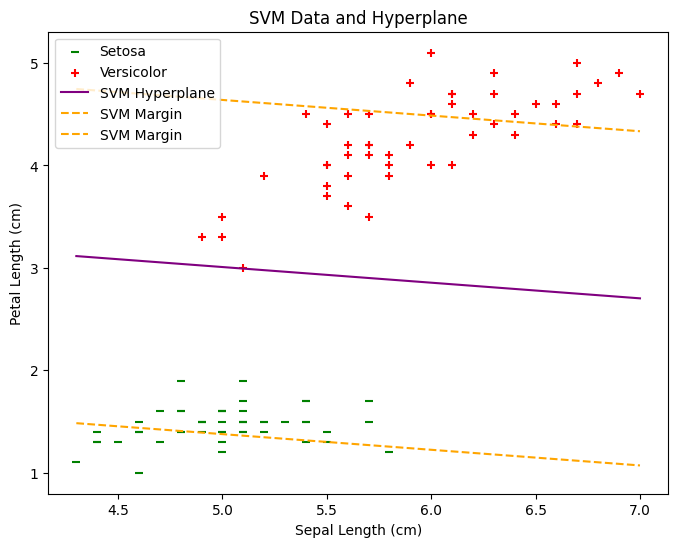

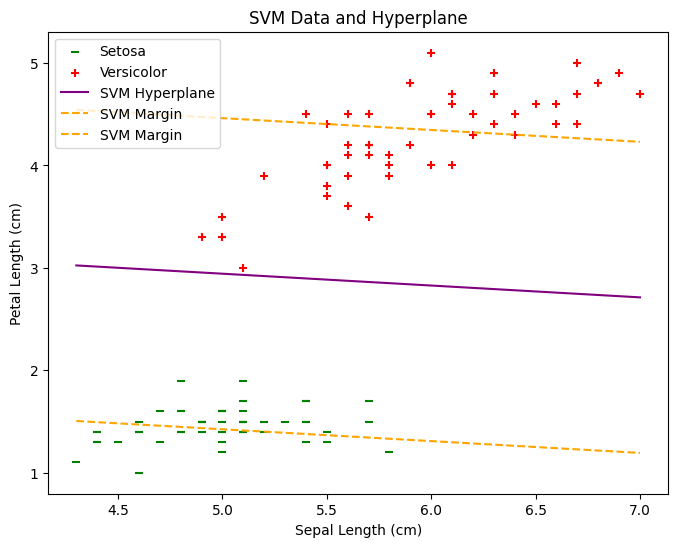

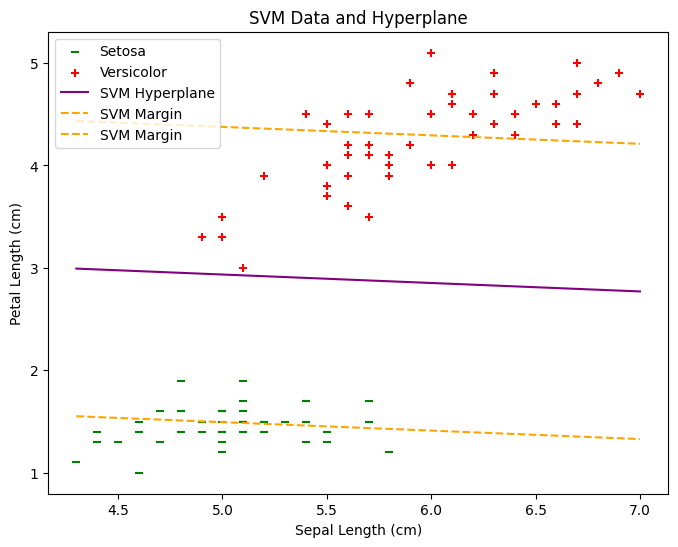

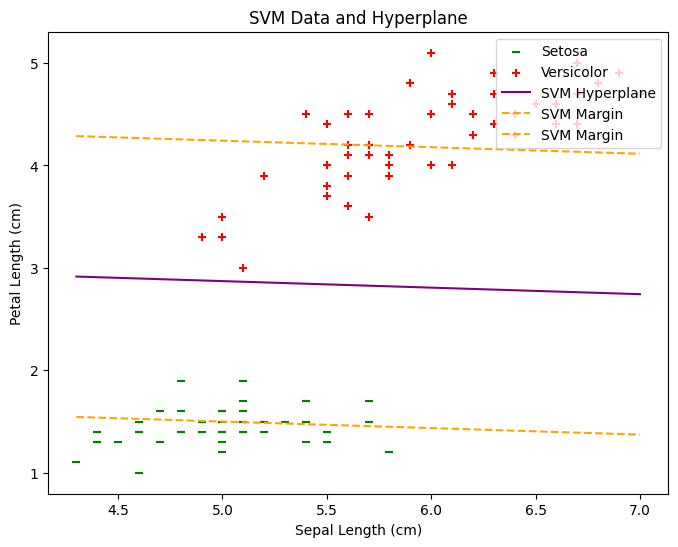

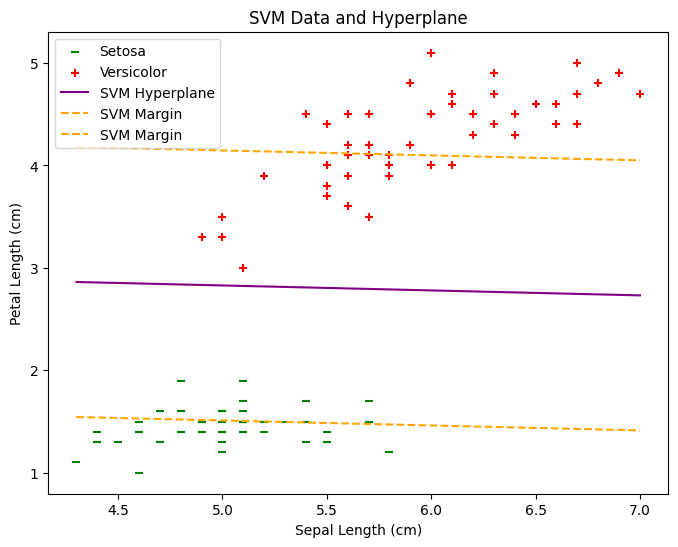

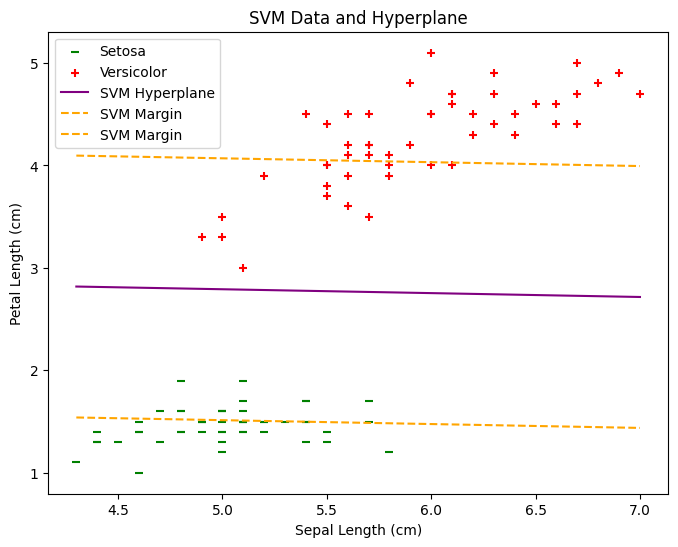

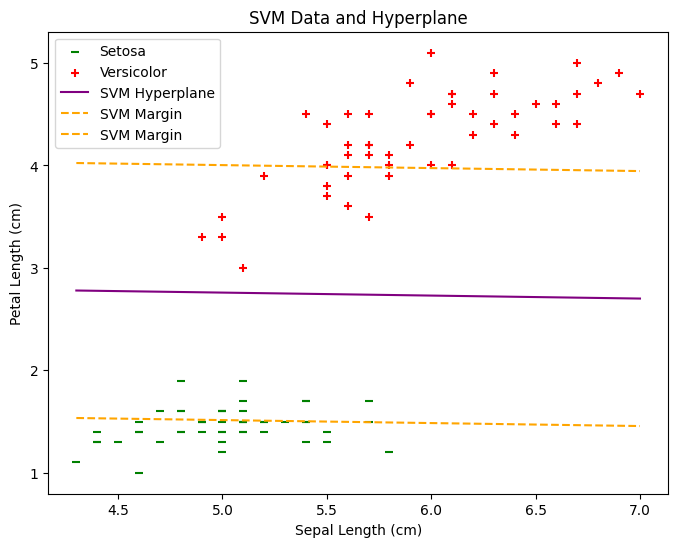

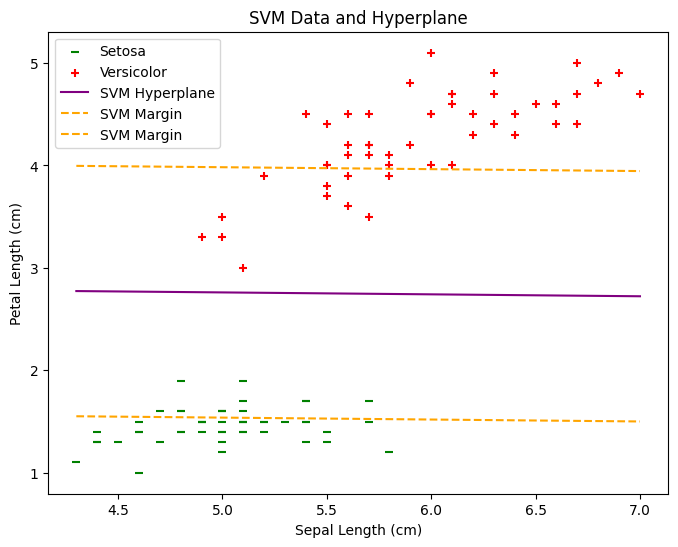

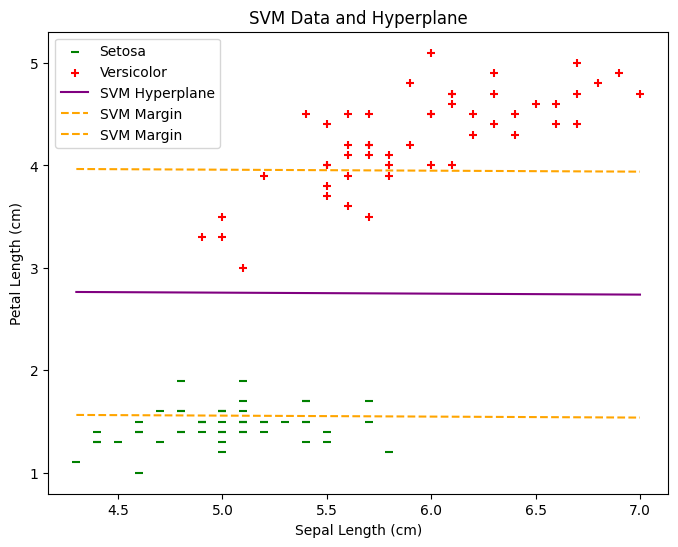

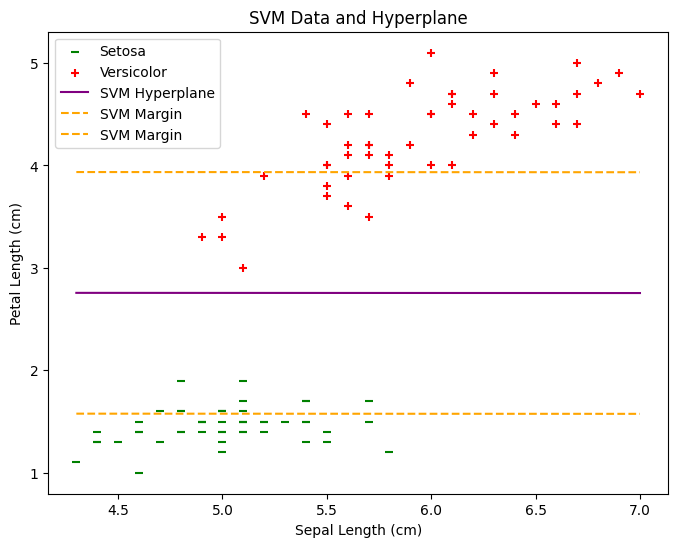

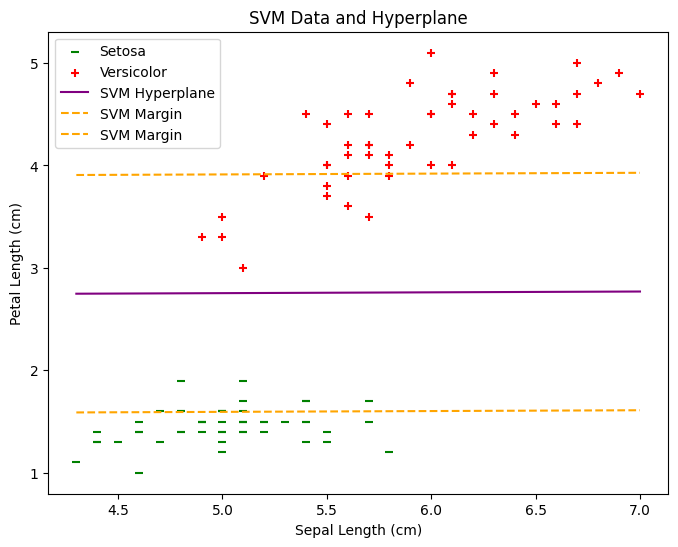

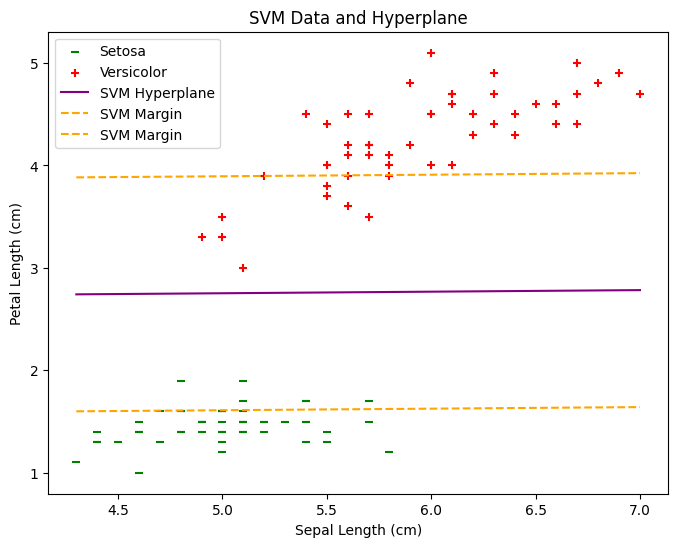

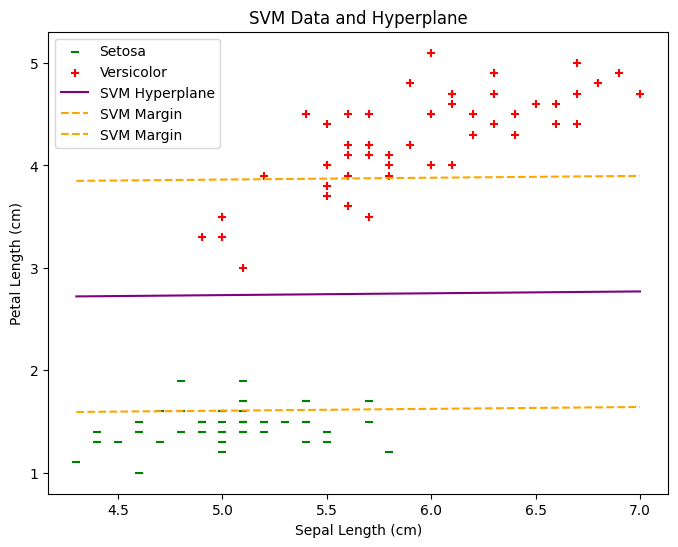

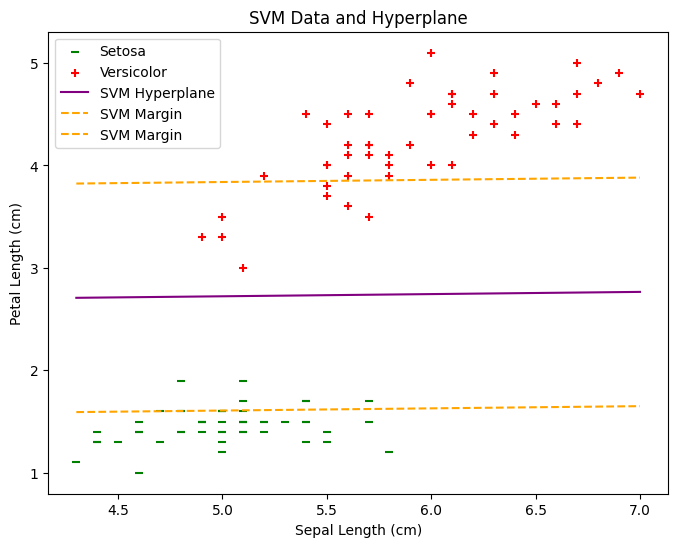

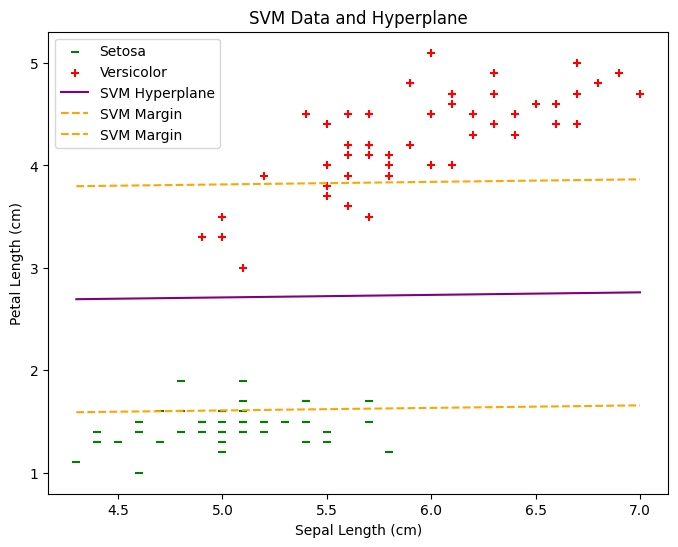

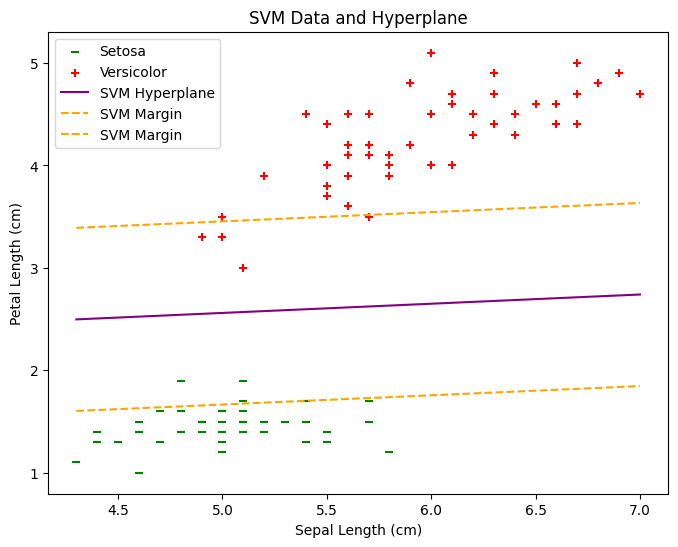

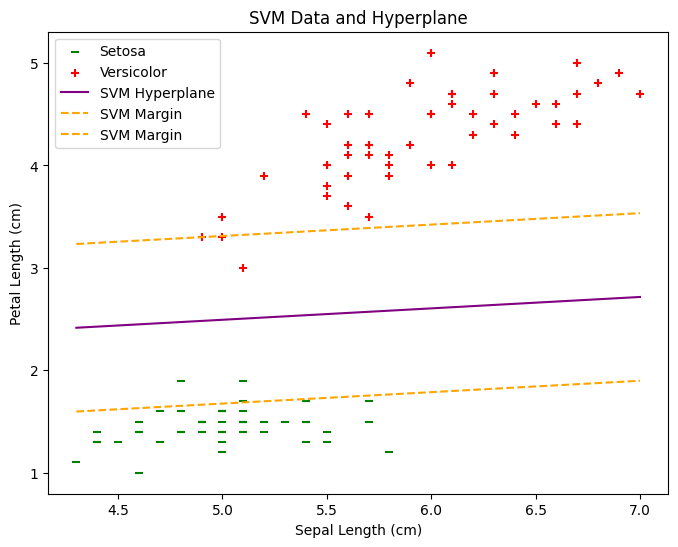

Epoch = 1000


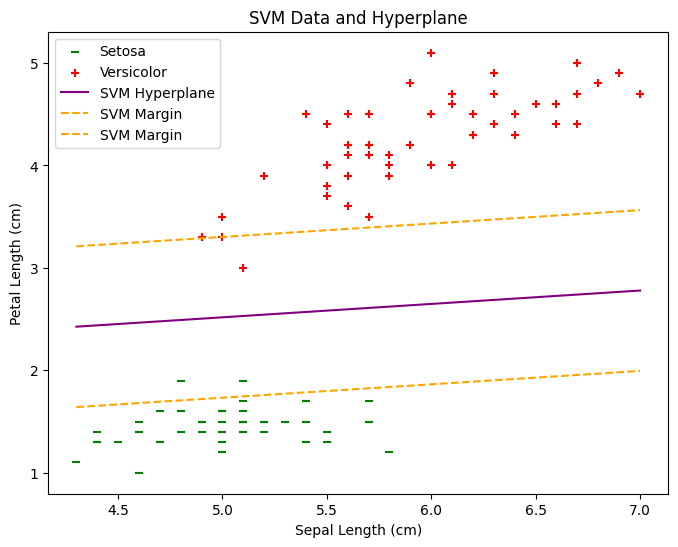

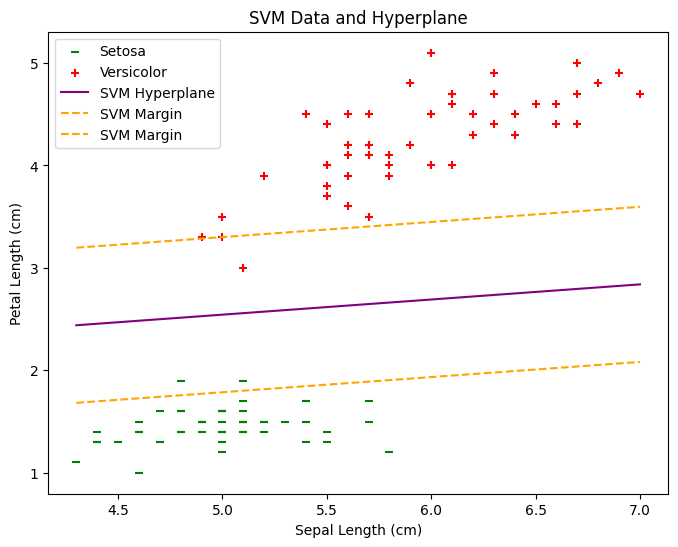

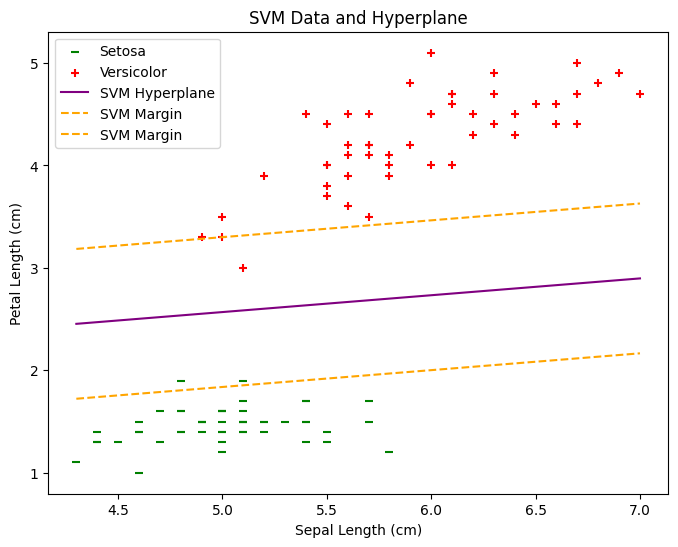

Epoch = 2000


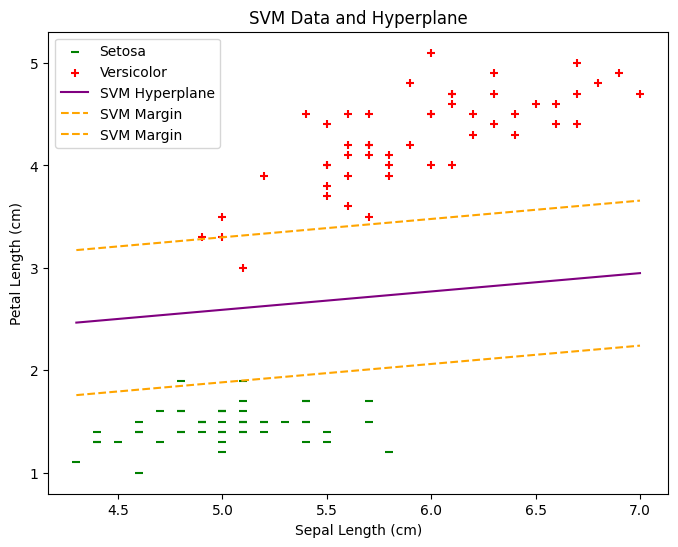

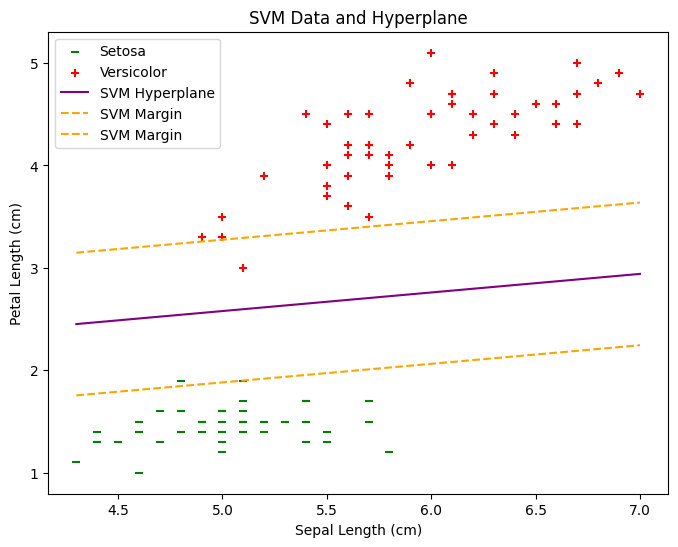

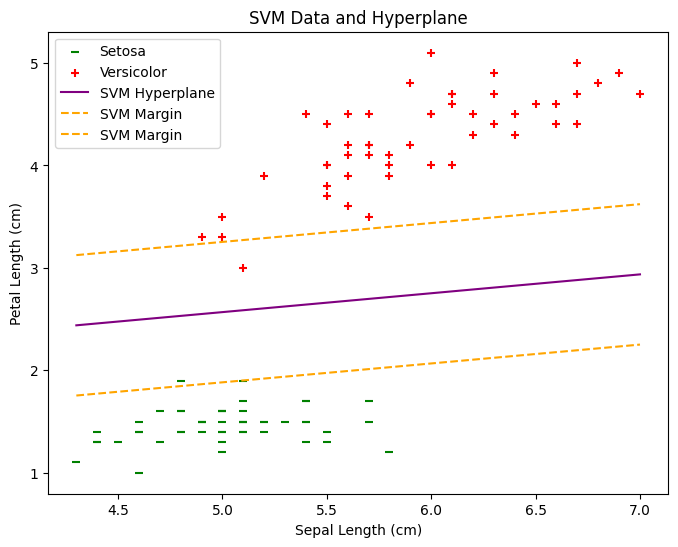

Epoch = 3000


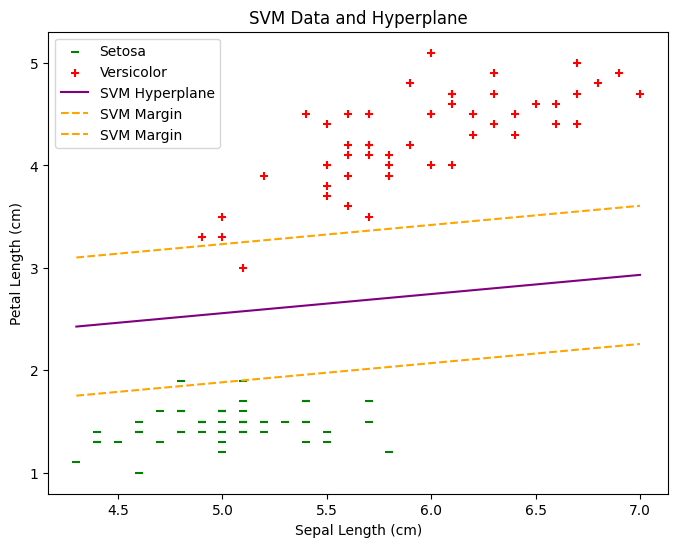

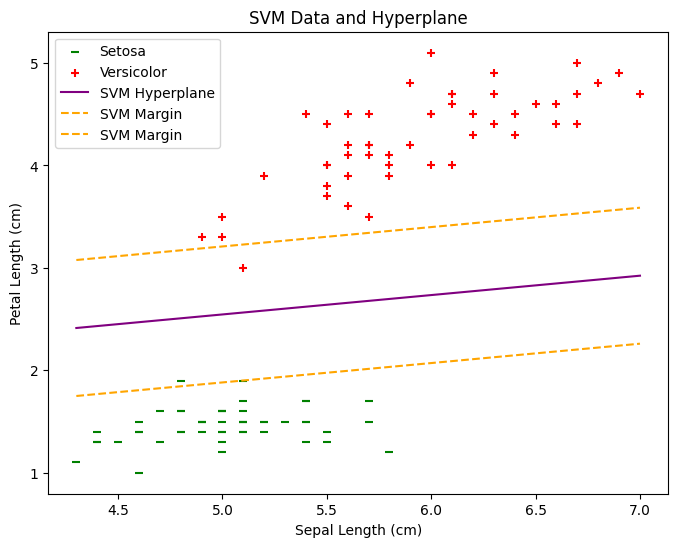

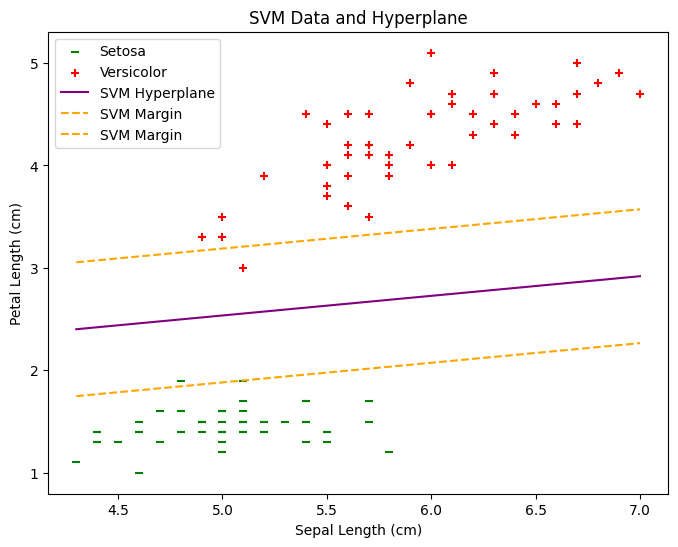

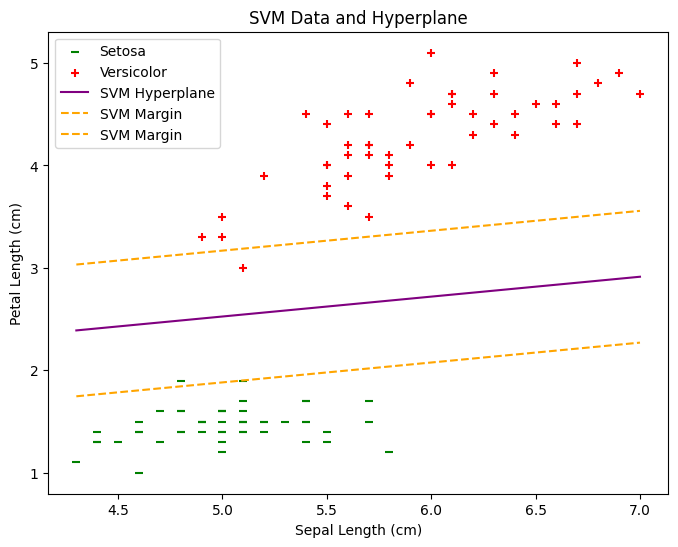

Epoch = 4000


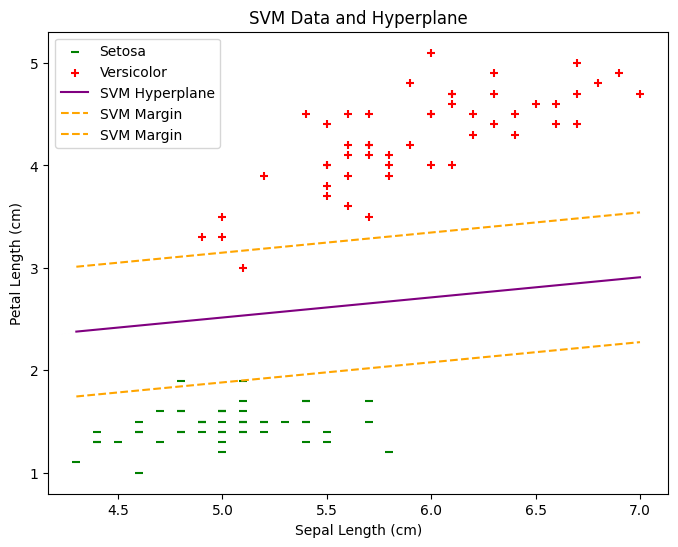

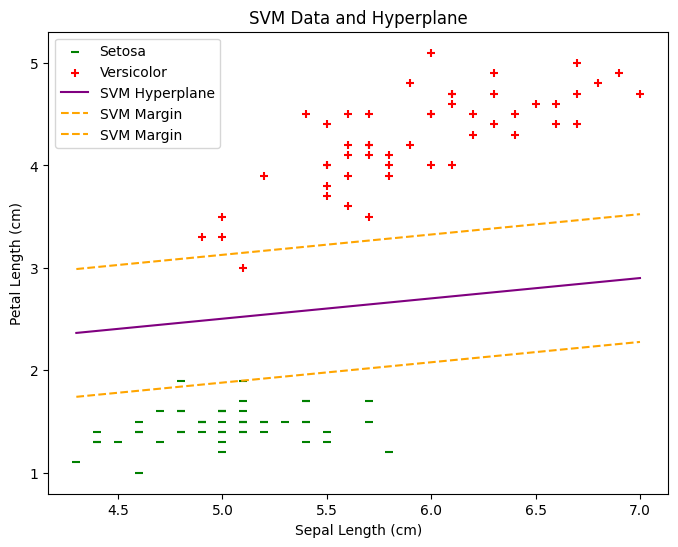

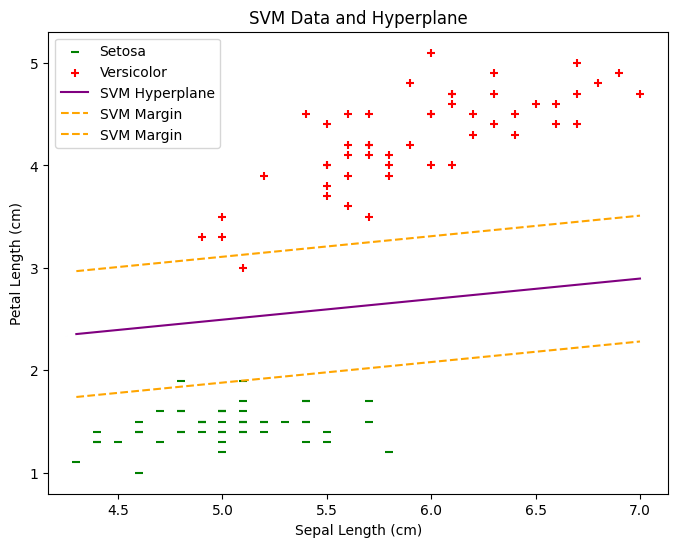

Epoch = 5000


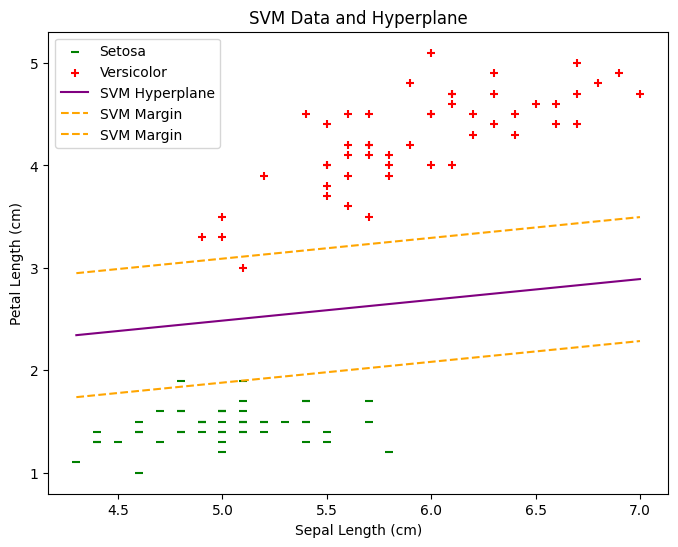

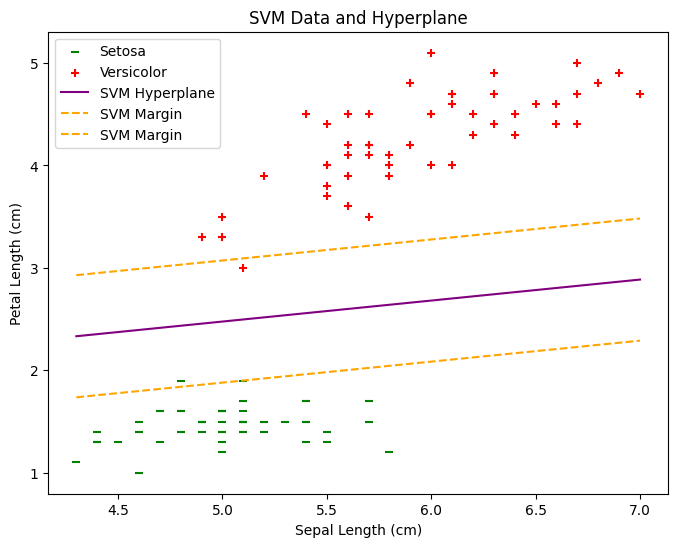

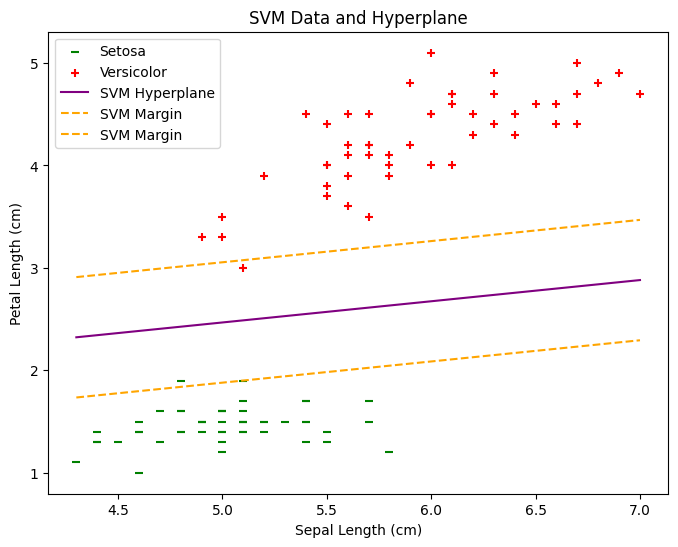

Epoch = 6000


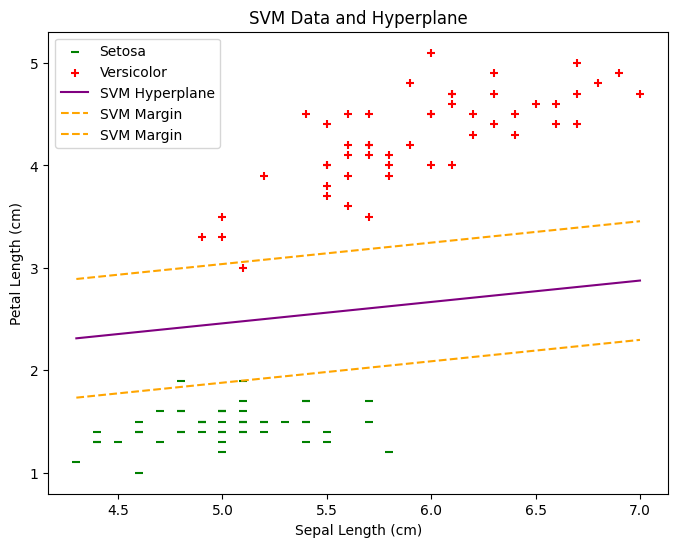

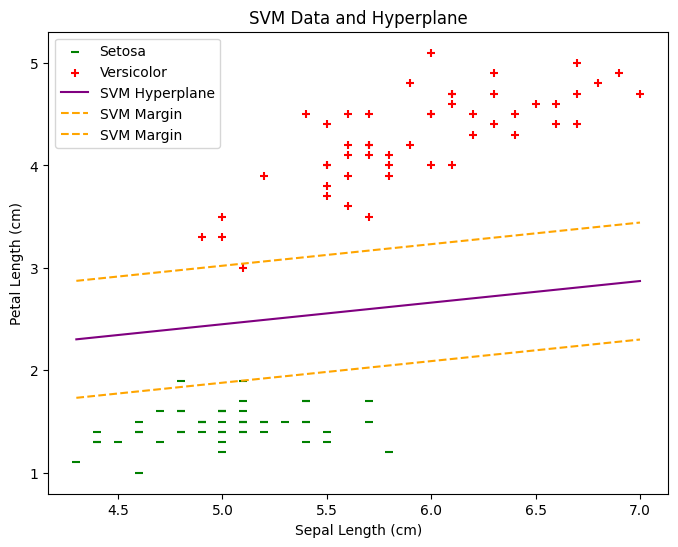

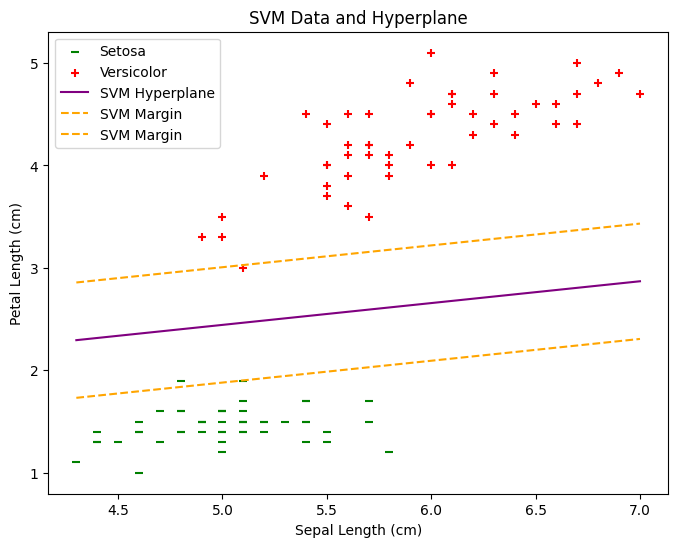

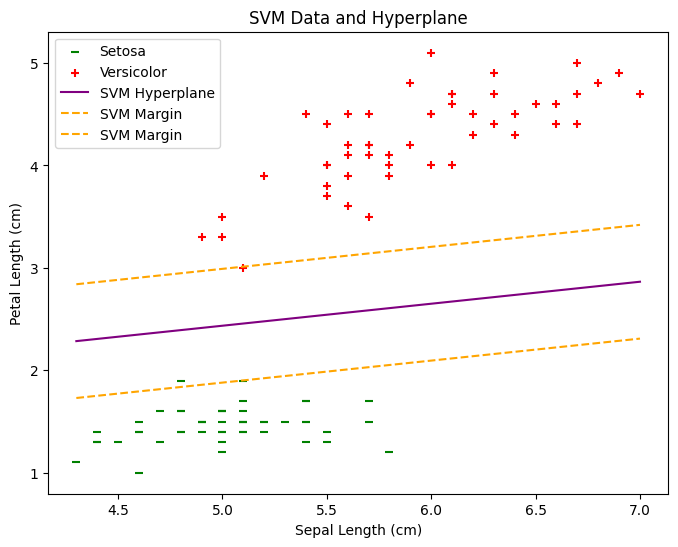

Epoch = 7000


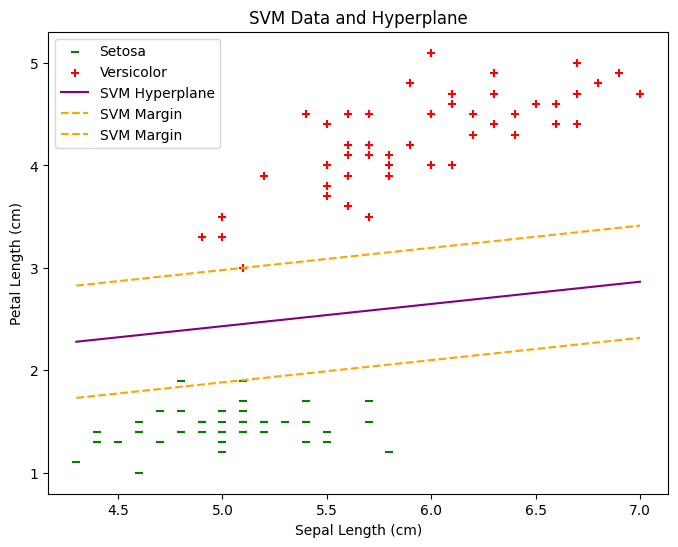

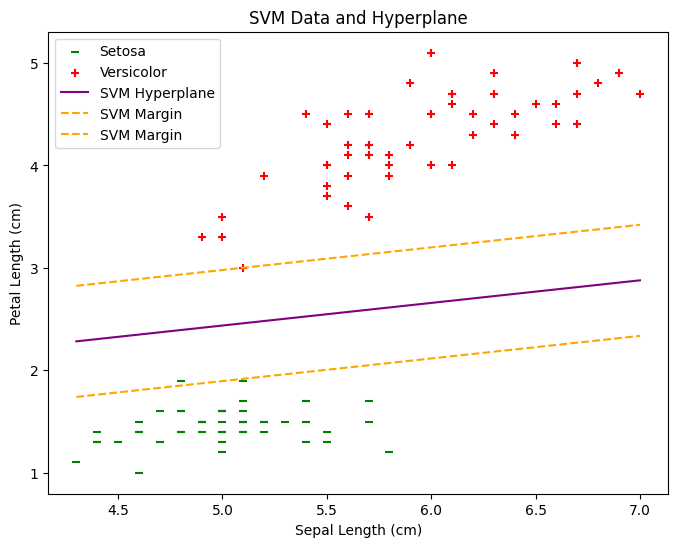

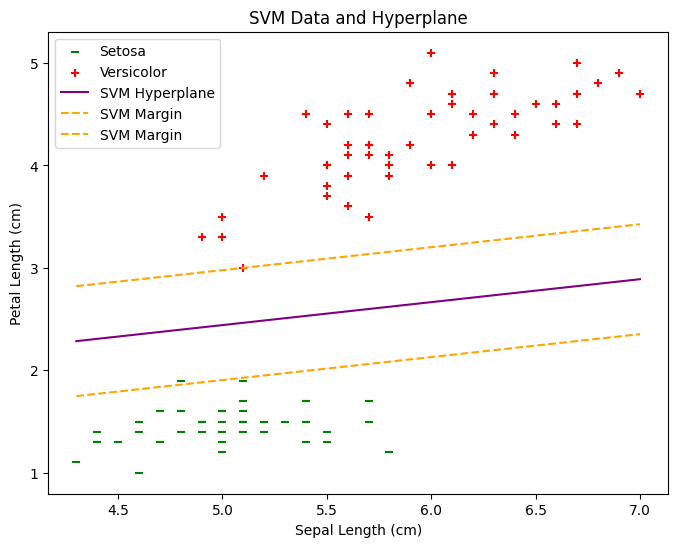

Epoch = 8000


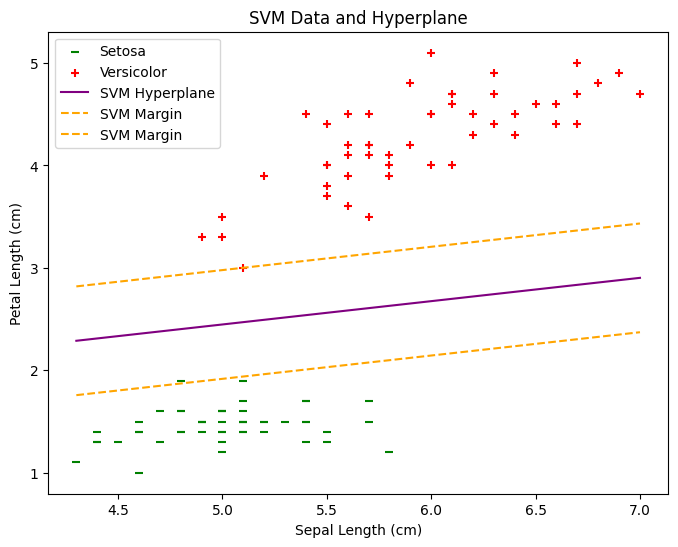

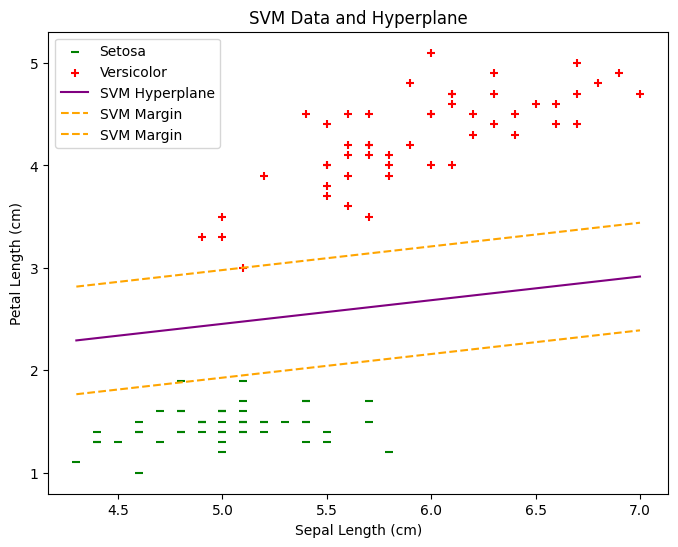

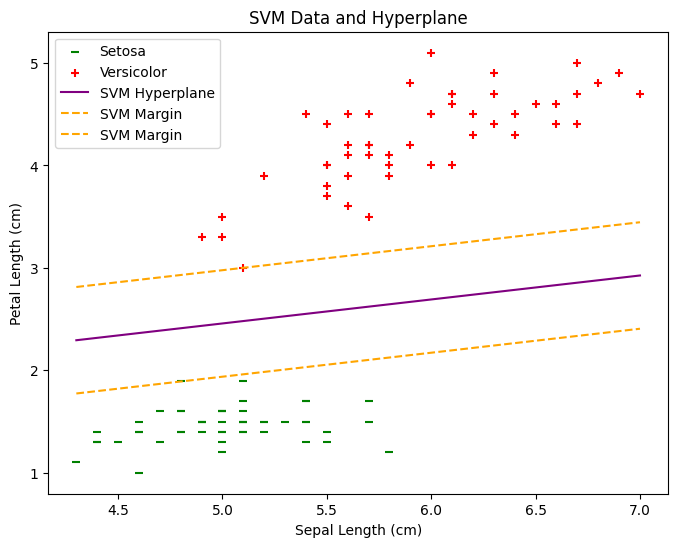

Epoch = 9000


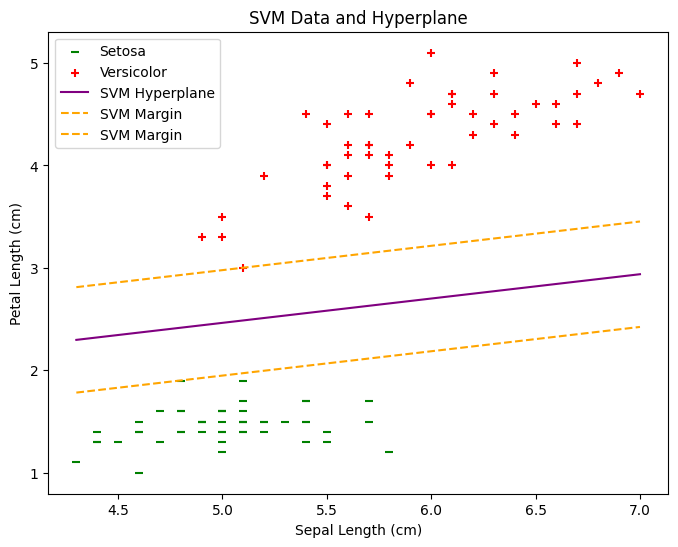

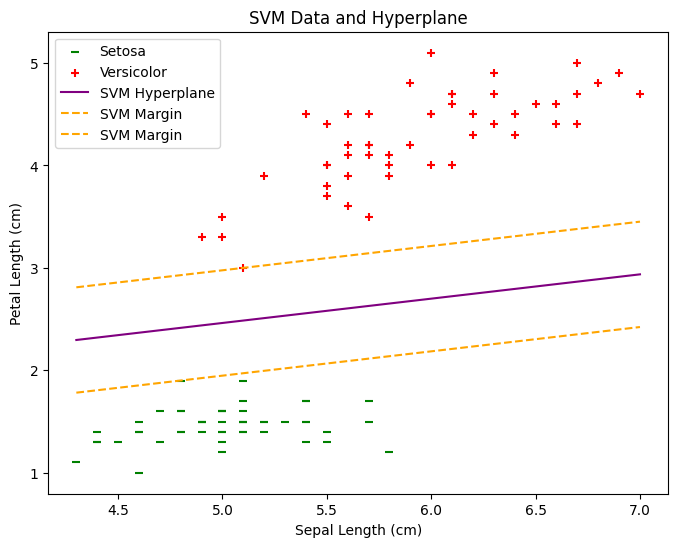

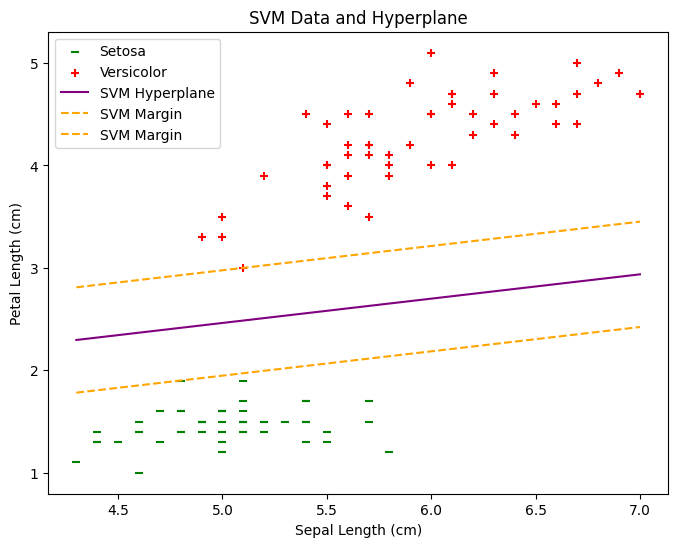

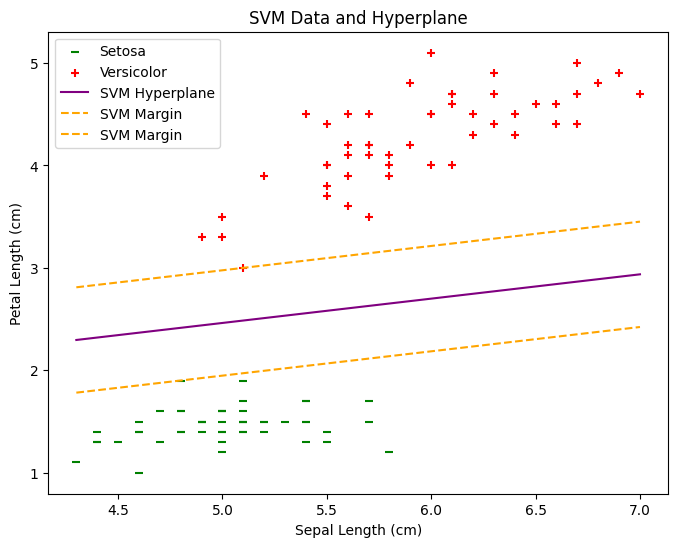

In [ ]:
train_feature1 = x_train[:,0] # Extract feature1 from x_train
""" Above code can be explained as:
import numpy as np

x_train = np.array([[1, 2], [3, 4], [5, 6]])
train_f1 = x_train[:, 0]

print(x_train)
# Output:
# [[1 2]
#  [3 4]
#  [5 6]]

print(train_f1)
# Output: [1 3 5]
"""

train_feature2 = x_train[:,1] # Extract feature2 from x_train

# Reshape train_feature1 and train_feature2 same as y_train and y_test
train_f1 = train_feature1.reshape(int(train_size*100),1) # Reshape to (90,1) vector
train_f2 = train_feature2.reshape(int(train_size*100),1) # Reshape to (90,1) vector

# Initialize w1, w2 and b as Zero
w1 = 1.5
w2 = 0
b = 2

epochs = 1
alpha = 0.0001

while(epochs < 10000):
  # Initialize y as empty vector at the beginning of each epoch
  Y_pred = []
  for i in range(0, int(train_size*100)): # range(0,90)
    y = w1 * train_f1[i] + w2 * train_f2[i] - b
    Y_pred.append(y)
  # Reshape Y_pred to (90,1)
  Y_pred = np.array(Y_pred).reshape(int(train_size*100),1)
  if (epochs % 1000 == 0):
    print(f"Epoch = {epochs}")
  if ((epochs > 5 and epochs < 300 and epochs % 10 == 0) or epochs % 300 == 0):
    plot_svm_data_with_point_and_hyperplane(x1 = None, y1 = None, w = [w1,w2], b = b)
  prod = y_train * Y_pred
  for i, val in enumerate(prod):
    if (val >= 1): # no misclassification
      cost = 0 # hinge loss = 0
      w1 = w1 - alpha * (2 * 1/epochs * w1) # Regularization parameter(lambda) = 1/epochs
      w2 = w2 - alpha * (2 * 1/epochs * w2) # Regularization parameter(lambda) = 1/epochs
    else:
      cost = 1 - val
      w1 = w1 + alpha * (train_f1[i] * y_train[i] - 2 * 1/epochs * w1) # Regularization parameter(lambda) = 1/epochs
      w2 = w2 + alpha * (train_f2[i] * y_train[i] - 2 * 1/epochs * w2) # Regularization parameter(lambda) = 1/epochs
      b = b - alpha * y_train[i]
  epochs += 1

In [ ]:
print(f"w1 : {w1}")
print(f"w2 : {w2}")
print(f"b : {b}")

w1 : [-0.46148703]
w2 : [1.94462561]
b : [2.4799]


w1 : [-0.80563563]
w2 : [1.70345537]
b : [0.3697]

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Extract the test data features
test_feature1 = x_test[:,0]
test_feature2 = x_test[:,1]

test_f1 = test_feature1.reshape(10,1)
test_f2 = test_feature2.reshape(10,1)

# Predict

# Initialize empty numpy array
y_pred = np.array([])

# Iterate over test data
for i in range(len(test_f1)):
    y = w1 * test_f1[i] + w2 * test_f2[i] - b
    y_pred = np.append(y_pred, y)
print(y_pred)
predictions = []
for val in y_pred:
  if(val >= 0):
    predictions.append(1)
  else:
    predictions.append(-1)

print(accuracy_score(y_test, predictions))


[ 3.03063829 -1.9725619   2.48353156  2.1770361  -2.0187106  -1.72208288
  2.52968026  3.1690844   3.0570515  -1.91654544]
1.0


In [ ]:
new_sepal_length = 5.0
new_petal_length = 1.2
y_of_new_sample = w1 * new_sepal_length + w2 * new_petal_length - b
if (y_of_new_sample[0] >= 1):
  print(f"New sample is Versicolor.")
else:
  print(f"New sample is Setosa.")

New sample is Setosa.


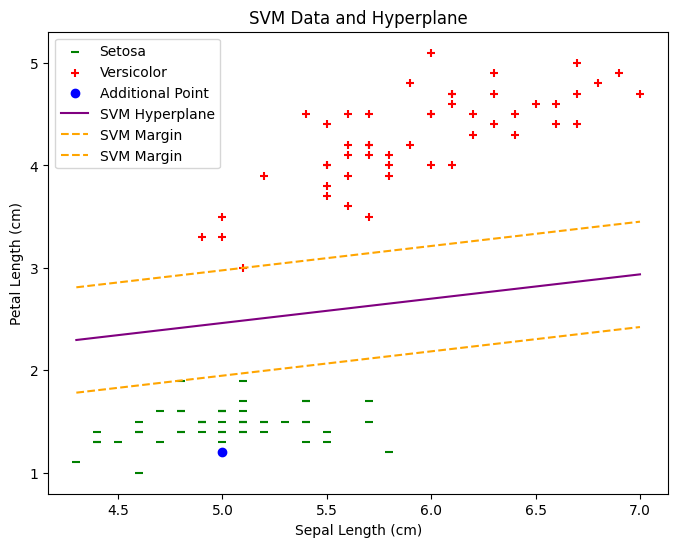

In [ ]:
plot_svm_data_with_point_and_hyperplane(new_sepal_length, new_petal_length, [w1,w2], b)